# Clase 13: El método de Newton

## El método de Newton

Este es uno de los métodos más conocidos (y poderosos) para encontrar el cero de una función.

Una manera heurística de deducirlo es a partir de la serie de Taylor. Si tenemos un punto $p_o$ cercano al cero de la función $p$ entonces

$$
0 = f(p) = f(p_o) + f'(p_o)(p - p_o) + \frac{1}{2}f''(\xi)(p - p_o)^2
$$

para algún $\xi$ entre $p$ y $p_o$. Si $p$ es lo suficientemente cercano a $p_o$, podemos ignorar ese segundo término y obtener

$$
0 \approx f(p_o) + f'(p_o)(p - p_o)
$$

despejando encontramos una aproximación para $p$

$$
p \approx p_o - \frac{f(p_o)}{f'(p_o)}
$$

A esta aproximación la llamamos $p_1$ y debería ser más cercana a $p$. Podemos entonces repetir el proceso empezando desde $p_1$.

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class MaxIterations(Exception):
    pass

In [59]:
def newton(f, df, po, epsilon, N=1000000):
    
    for i in range(N):
        p = po - f(po)/df(po)
        if abs(p - po)/abs(p) < epsilon:
            return p, i+1
        po = p
    
    raise MaxIterations("No se encontró el cero luego de", N, "iteraciones.")

Así como antes, puede haber varios criterios para determinar la convergencia de este algoritmo. Comparemos con el método de bisección.

In [60]:
def biseccion(f, a, b, epsilon, N=1000000):
    
    pp = a
    for i in range(N):
        p = a + (b - a)/2
        if abs(pp - p)/abs(p) < epsilon:
            return p, i+1
        elif f(p)*f(a) > 0:
            a = p
        else:
            b = p
        pp = p
        
    raise MaxIterations("No se encontró el cero luego de", N, "iteraciones.")

In [61]:
def f(x):
    return x - np.cos(x)

In [62]:
def df(x):
    return 1 + np.sin(x)

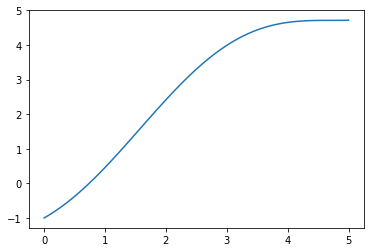

In [63]:
x = np.linspace(0,5,100)
plt.plot(x, f(x))

In [64]:
biseccion(f, 0, 1, 0.00001)

(0.7390861511230469, 18)

In [65]:
newton(f, df, 1, 0.00001)

(0.7390851332151606, 4)

**Teorema**: Sea $f \in C^2[a, b]$ tal que $f(p) = 0$. Entonces existe un $\delta$ tal que el método de Newton genera una secuencia en $[p - \delta, p + \delta]$ que converge a $p$ a partir de cualquier $p_o \in (p - \delta, p + \delta)$.

Se demuestra demostrando antes que $g(x) = x - f(x)/f'(x)$ tiene un punto fijo.

Supongamos que $f'(p_o) \neq 0$. Entonces como $f'$ es continua existe una vecindad $(p - \delta_1, p + \delta_1)$ en la cual $f'(x) \neq 0$, tal que $g(x) \in C(p - \delta_1, p + \delta_1)$.

Primero verifiquemos la condición sobre la derivada

$$
g'(x) = \frac{f(x)f''(x)}{(f'(x))^2}
$$

y vemos que $g'(p) = 0$. Como $g'(x)$ es continua esto quiere decir que para todo $0 < k < 1$ existe $\delta>0$ tal que

$$
|g'(x)| < k\quad \text{si} \quad |x - p| < \delta\,.
$$

Luego, si $x \in [p - \delta, p + \delta]$ queremos demostrar que $g(x) \in [p - \delta, p + \delta]$ para cualquier $\delta \leq \delta_1$. Esto se hace usando el teorema del valor intermedio

$$
|g(x) - p| = |g(x) - g(p)| = |g'(\xi)||x - p| < k |x - p| < \delta
$$



El problema del método de Newton es que necesitamos la derivada, pero como veremos ésta puede en general ser costosa de calcular (más costosa que encontrar el cero). Por eso se introduce el método de la secante que consiste en aproximar

$$
f'(p_n) \approx \frac{f(p_n) - f(p_{n-1})}{p_n - p_{n-1}}
$$

In [26]:
def secante(f, po, p1, epsilon, N=1000000):
    
    qo = f(po)
    q1 = f(p1)
    for i in range(1, N):
        p = p1 - q1*(p1 - po)/(q1 - qo)
        if abs(p - p1)/abs(p) < epsilon:
            return p, i
        po = p1
        p1 = p
        qo = q1
        q1 = f(p1)
        
    raise MaxIterations('No se encontró el cero luego de', N, 'iteraciones')

In [27]:
secante(f, 0, 1, 0.00001)

(0.7390851332150012, 5)

## Convergencia del método de Newton

Para una sucesión $\{p_n\}$ se dice que tiene orden de convergencia $\alpha$ con constante de error $\lambda$ si

$$
\lim_{n \rightarrow \infty}\frac{|p_{n+!} - p|}{|p_n - p|^\alpha} = \lambda
$$

**Teorema:** Para $g$ que satisface las condiciones necesarias de convergencia del método de iteración de punto fijo, éste converge linealmente ($\alpha = 0$) si $g'(x) \neq 0$ en todo punto de la secuencia.

$$
|p_{n+1} - p| = |g(p_n) - g(p)| = |g(\xi_n)||p_n - p|
$$

para algún $\xi$ entre $p_n$ y $p$. Como $\lim_{n\rightarrow\infty} p_n = p$ tenemos que $\xi_n \rightarrow p$ y

$$
\lim_{n\rightarrow\infty} \frac{|p_{n+1} - p|}{|p_n - p|} = \lim_{n\rightarrow \infty} |g(\xi_n)| = |g(p)|
$$

**Teorema**: Sea $p$ tal que $p = g(p)$ con $g'(p) = 0$ y $g''(x)$ continua y acotada en un intervalo abierto que contiene $p$, es decir $|g''(x)| < M$. Entonces existe un intervalo $(p - \delta, p + \delta)$ tal que la secuencia $p_n = g(p_{n-1})$ converge a $p$ cuadráticamente ($\alpha = 2$).

Como $g'$ es continua tenemos que existe un intervalo $(x - \delta, x + \delta)$ alrededor de $p$ tal que $|g'(x)| < k$. Así mismopor el argumento usual $g(x) \in (x - \delta, x + \delta)$ para $x \in (x - \delta, x + \delta)$. Por estos motivos concluimos que la secuencia converge a $p$.

Además

$$
g(x) = g(p) + g'(p)(x - p) + \frac{g''(\xi)}{2}(x - p)^2
$$

entonces

$$
p_{n+1} = g(p_n) = p + \frac{g''(\xi)}{2}(p_n - p)^2
$$

por lo cual

$$
\lim_{n\rightarrow \infty}\frac{|p_{n+1} - p|}{|p_n - p|} = \frac{|g''(p)|}{2}
$$

El método de Newton es tal que $g(x) = x - f(x)/f'(x)$ satisface las condiciones de este teorema. Por eso es tan rápido.

Hay problemas cuando la multiplicidad de un cero es mayor que uno, es decir cuando $f(x) = q(x)(x - p)^n$ con $n > 1$ y $q(p) \neq 0$. Para resolver este problema existe el método de Newton modificado.

## Métodos de scipy

Estos métodos ya fueron programados en scipy. Lo siguiente es copiado de su documentación (https://docs.scipy.org/doc/scipy/reference/optimize.html).

In [31]:
from scipy import optimize

In [32]:
def f(x):
    return (x**3 - 1)

def fprime(x):
    return 3*x**2

In [33]:
# El método de Brent es considerado el mejor, es una modificación del método de la secante.
# Implementa una fase inicial de acercamiento al cero usando bisección.

# Es necesario dar el intervalo en el cual se encuentra el cero.
sol = optimize.root_scalar(f, bracket=[0, 3], method='brentq')
sol.root, sol.iterations, sol.function_calls

(1.0, 10, 11)

In [34]:
# Podemos también llamar directamente el método de Newton si tenemos la derivada.

sol = optimize.root_scalar(f, x0=0.2, fprime=fprime, method='newton')
sol.root, sol.iterations, sol.function_calls

(1.0, 11, 22)

## Tareas

### Tarea 7.1

Encuentre un cero de la función

$$
f(x) = 1 - \cos(x) -\frac{\sin(x)}{x}
$$

entre $-6.4$ y $-6.0$ usando el método de Newton y el método de bisección. Grafique el número de iteraciones requerido así como el tiempo requerido en función de la precisión para ambos métodos.

In [70]:
def func(x):
    return 1 - np.cos(x) - np.sin(x)/x

In [71]:
def df(x):
    return np.sin(x) - np.cos(x)/x + np.sin(x)/x**2

In [80]:
def biseccion(f, a, b, epsilon, N=1000000):
    
    pp = a
    for i in range(N):
        p = a + (b - a)/2
        if abs(pp - p)/abs(p) < epsilon:
            return p, i+1
        elif f(p)*f(a) > 0:
            a = p
        else:
            b = p
        pp = p
        
    raise MaxIterations("No se encontró el cero después de", N, "iteraciones.")

In [81]:
def newton(f, df, po, epsilon, N=1000000):
    
    for i in range(N):
        p = po - f(po)/df(po)
        if abs(p - po)/abs(p) < epsilon:
            return p, i+1
        po = p
    
    raise MaxIterations("No se encontró el cero luego de", N, "iteraciones.")

In [82]:
from time import time_ns

def medir_tiempo(func, *args):
    t1 = time_ns()
    res = func(*args)
    tf = time_ns() - t1
    return res, tf

In [91]:
exps = np.linspace(-20,-10,10)
errors = 10**exps
resultados_bis = [medir_tiempo(biseccion, func, -6.4, -6.0, e) for e in errors]
resultados_newt = [medir_tiempo(newton, func, df, -6.3, e) for e in errors]

In [101]:
tiempos_bis = [r[1] for r in resultados_bis]
tiempos_newt = [r[1] for r in resultados_newt]
iters_bis = [r[0][1] for r in resultados_bis]
iters_newt = [r[0][1] for r in resultados_newt]

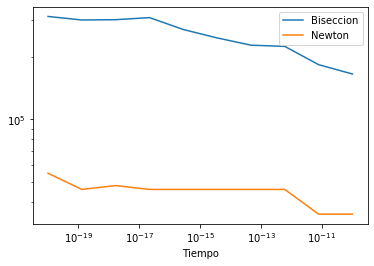

In [105]:
plt.loglog(errors, tiempos_bis, label = 'Biseccion')
plt.loglog(errors, tiempos_newt, label = 'Newton')
plt.xlabel('Precisión')
plt.xlabel('Tiempo')
plt.legend()

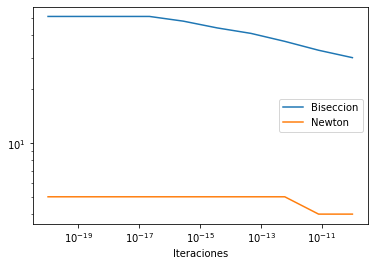

In [106]:
plt.loglog(errors, iters_bis, label = 'Biseccion')
plt.loglog(errors, iters_newt, label = 'Newton')
plt.xlabel('Precisión')
plt.xlabel('Iteraciones')
plt.legend()

### Tarea 7.2

Queremos encontrar los ceros de la función $f(x) = \sinh(x) - \cos(x)$. Para lograrlo, primero use algunas iteraciones del método de bisección y así obtener un punto inicial para el método de Newton.

In [60]:
def newton(f, df, po, epsilon, N=1000000):
    
    for i in range(N):
        p = po - f(po)/df(po)
        if abs(p - po)/abs(p) < epsilon:
            return p
        po = p
    
    raise MaxIterations("No se encontró el cero luego de", N, "iteraciones.")

In [61]:
def biseccion(f, a, b, epsilon, N=1000000):
    
    pp = a
    for i in range(N):
        p = a + (b - a)/2
        if abs(pp - p)/abs(p) < epsilon:
            return p
        elif f(p)*f(a) > 0:
            a = p
        else:
            b = p
        pp = p
        
    raise MaxIterations("No se encontró el cero después de", N, "iteraciones.")

In [62]:
def f(x):
    return np.sinh(x) - np.cos(x)

def df(x):
    return np.cosh(x) + np.sin(x)

In [63]:
biseccion(f, -9, 10, 0.01)

0.699462890625

In [64]:
newton(f, df, 0.699462890625, 10**(-8) )

0.7032906588639655

### Tarea 7.3

Ejercicio 2.1.15 del libro de Burden.

Un abrevadero (contenedor de agua para dar de beber a los animales) es mitad de un cilindro. Tiene una sección transversal a forma de semi-círculo de radio $r = 48.934$ cm y una longitud $L = 1.3245$ m. Si el volumen del agua contenido es de $10.013$ litros, encuentre la profundidad del agua en metros con una precisión de cinco cifras decimales. (Para lograrlo, primero use algunas iteraciones del método de bisección y así obtener un par de puntos iniciales para el método de Newton.).

El volumen es el área de un sector del círculo menos el área de un triángulo, todo multiplicado por la longitud:

$$
V = L\left(\cos^{-1}\left(\frac{(r - p)}{r}\right) r^2 - \frac{1}{2}(r - p)\sqrt{r^2 + (r - p)^2}\right)
$$

Tenemos que encontrar el valor de $p$.

In [69]:
(1/2)*np.pi*0.48**2*1.3

0.4704849158016074

In [85]:
def func(p):
    V = 0.010013 # en m^3
    L = 1.3245   # en m
    r = 0.48934  # en m
    raiz = np.sqrt(2*r*r - 2*r*p + p*p)
    return (L/2)*(np.arccos((r - p)/r)*r*r - (r - p)*raiz) - V

In [90]:
def biseccion(f, a, b, epsilon, N=1000000):
    
    pp = a
    for i in range(N):
        p = a + (b - a)/2
        if abs(pp - p)/abs(p) < epsilon:
            return p, pp
        elif f(p)*f(a) > 0:
            a = p
        else:
            b = p
        pp = p
        
    raise MaxIterations("No se encontró el cero después de", N, "iteraciones.")

In [91]:
def secante(f, po, p1, epsilon, N=1000000):
    
    qo = f(po)
    q1 = f(p1)
    for i in range(1, N):
        p = p1 - q1*(p1 - po)/(q1 - qo)
        if abs(p - p1)/abs(p) < epsilon:
            return p, i
        po = p1
        p1 = p
        qo = q1
        q1 = f(p1)
        
    raise MaxIterations('No se encontró el cero luego de', N, 'iteraciones')

In [92]:
biseccion(func, 0, 0.48, 0.1)

(0.16499999999999998, 0.15)

In [93]:
secante(func, 0.15, 0.16499999999999998, 0.00001)

(0.16704490695768703, 3)

### Tarea 7.4

Ejercicio 2.3.25, libro de Burden:

El modelo logístico de crecimimiento de poblaciones está descrito por una ecuación de la forma:

$$
P(t) = \frac{P_L}{1 - ce^{-k t}}\,.
$$

Use los datos correspondientes a 1960, 1970 y 1980 de la siguiente tabla para encontrar $c$, $k$ y $P_L$. Luego prediga los valores para 1990 y 2020. Compare la predicción para 1990 con los datos reales de la tabla.

|Población| Año|
|---------|----|
|179 323  |1960|
|203 302  |1970|
|226 542  |1980|
|249 633  |1990|
|281 422  |2000|
|308 746  |2010|

Tenemos el sistema de ecuaciones

$$
P(1960) = \frac{P_L}{1 - c}
$$

$$
P(1970) = \frac{P_L}{1 - c e^{-k}}
$$

$$
P(1980) = \frac{P_L}{1 - c e^{-2k}}
$$

Despejando:

$$
c = 1 - \frac{P_L}{P(1960)}
$$

$$
e^{-k} = \frac{1 - \frac{P_L}{P(1970)}}{1 - \frac{P_L}{P(1960)}}
$$

$$
\left(1 - \frac{P_L}{P(1960)} - \left(1 - \frac{P_L}{P(1970)}\right)^2\right)P(1980) = P_L\left(1 - \frac{P_L}{P(1960)}\right)
$$

Resolvemos esta última ecuación

In [130]:
P1980 = 226542
P1970 = 203302
P1960 = 179323

def f(PL):
    return (1 - PL/P1960 - (1 - PL/P1970)**2)*P1980 - PL*(1 - PL/P1960)

In [131]:
def biseccion(f, a, b, epsilon, N=1000000):
    
    pp = a
    for i in range(N):
        p = a + (b - a)/2
        if abs(pp - p)/abs(p) < epsilon:
            return p, pp
        elif f(p)*f(a) > 0:
            a = p
        else:
            b = p
        pp = p
        
    raise MaxIterations("No se encontró el cero después de", N, "iteraciones.")

In [138]:
biseccion(f, 1, 1000000, 0.01)

(365235.009765625, 363281.88671875)

In [133]:
def secante(f, po, p1, epsilon, N=1000000):
    
    qo = f(po)
    q1 = f(p1)
    for i in range(1, N):
        p = p1 - q1*(p1 - po)/(q1 - qo)
        if abs(p - p1)/abs(p) < epsilon:
            return p, i
        po = p1
        p1 = p
        qo = q1
        q1 = f(p1)
        
    raise MaxIterations('No se encontró el cero luego de', N, 'iteraciones')

In [141]:
PL = secante(f, 365235.009765625, 363281.88671875, 0.0001)[0]
expmk = (1 - PL/P1970)/(1 - PL/P1960)
c = (1 - PL/P1960) 

In [145]:
def pobl(t, PL, expmk, c):
    return PL/(1 - c*np.exp(np.log(expmk)*t))

In [146]:
pobl(3, PL, expmk, c)

248318.92822181608

In [147]:
pobl(6, PL, expmk, c)

300528.4946747103

### Tarea 7.5

Intente escribir su propia versión del método de Newton, haciéndola lo más rápida posible. Luego compare el tiempo que tarda en resolver el ejemplo de clase (el cero de la función $f(x) = x - \cos(x)$) con el tiempo que tarda el método de Newton que se encuentra en scipy.

In [11]:
def newton(f, df, po, epsilon, N=1000000):
    
    for i in range(N):
        p = po - f(po)/df(po)
        if abs(p - po)/abs(p) < epsilon:
            return p
        po = p
    
    raise MaxIterations("No se encontró el cero luego de", N, "iteraciones.")

In [12]:
from time import time_ns

def medir_tiempo(func, *args, **kwargs):
    t1 = time_ns()
    res = func(*args, **kwargs)
    tf = time_ns() - t1
    return res, tf

In [13]:
def f(x):
    return x - np.cos(x)

def df(x):
    return 1 + np.sin(x)

In [18]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

In [48]:
exps = np.linspace(-4,-2,10)
errors = 10**exps
resultados_mios = [medir_tiempo(newton, f, df, -6.1, e) for e in errors]
resultados_sp = [medir_tiempo(optimize.root_scalar, f, x0 = -6.1, fprime = df,  method = 'newton', rtol = e) for e in errors]

In [49]:
tiempos_mios = [r[1] for r in resultados_mios]
tiempos_sp = [r[1] for r in resultados_sp]

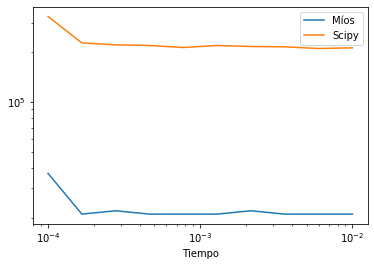

In [50]:
plt.loglog(errors, tiempos_mios, label = 'Míos')
plt.loglog(errors, tiempos_sp, label = 'Scipy')
plt.xlabel('Precisión')
plt.xlabel('Tiempo')
plt.legend()